<a href="https://colab.research.google.com/github/S-ABHISHEK-1905/mnist-classification/blob/main/abhiex03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ragul A C

Register Number: 212221240042

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

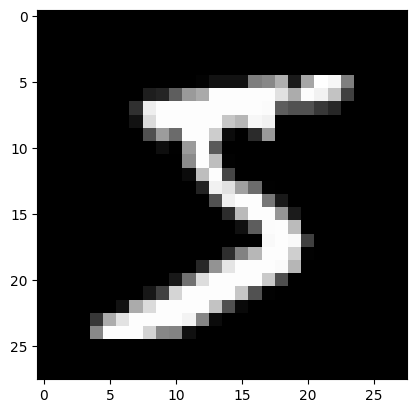

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

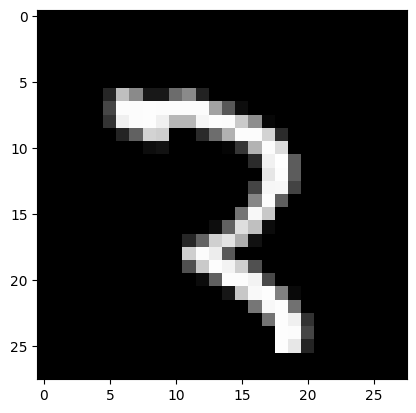

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name: S.ABHISHEK

Register Number:212221230002

In [ ]:
model = keras.Sequential()
# Write your code here
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

print(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 20)                128020    
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                        

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 10s 6ms/step - loss: 0.1935 - accuracy: 0.9406 - val_loss: 0.0497 - val_accuracy: 0.9849
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0548 - accuracy: 0.9835 - val_loss: 0.0422 - val_accuracy: 0.9871
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0339 - val_accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0375 - val_accuracy: 0.9872
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0272 - val_accuracy: 0.9920


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.193480,0.940617,0.049749,0.9849
1,0.054763,0.983517,0.042199,0.9871
2,0.039052,0.988183,0.033883,0.9895
3,0.028050,0.991417,0.037472,0.9872
4,0.021548,0.992867,0.027161,0.9920


<Axes: >

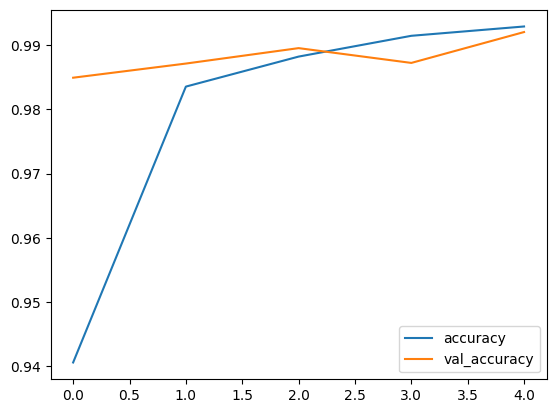

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

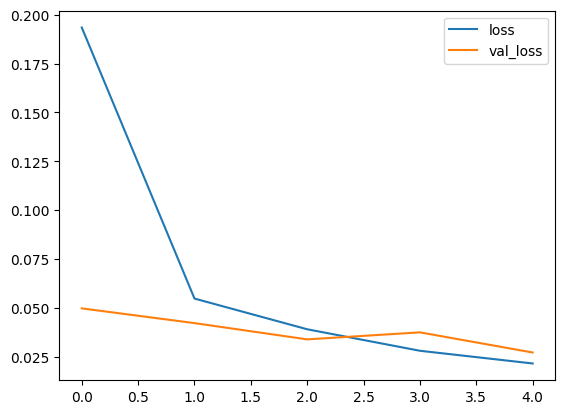

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 974    1    1    0    0    0    2    1    1    0]
 [   0 1131    0    3    1    0    0    0    0    0]
 [   0    0 1026    0    0    0    1    5    0    0]
 [   0    0    2 1003    0    3    0    1    1    0]
 [   0    0    0    0  970    0    4    0    1    7]
 [   0    0    1    6    0  879    2    0    0    4]
 [   2    2    0    0    0    1  952    0    1    0]
 [   0    2    3    0    0    0    0 1020    1    2]
 [   2    0    4    0    0    1    1    0  965    1]
 [   0    0    0    0    2    0    0    5    2 1000]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Prediction for a single input**



In [ ]:
img = image.load_img('5.png')

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('5.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 117ms/step


In [ ]:
print(x_single_prediction)

[8]


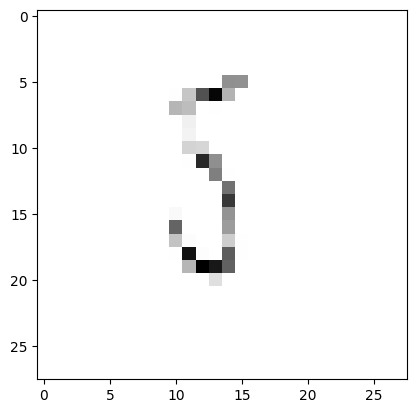

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 17ms/step


In [ ]:
print(x_single_prediction)

[5]
